In [72]:
import numpy,pandas,datetime
import matplotlib,matplotlib.pyplot
import scanpy
scanpy.settings.verbosity=5

# 6. Vizualization

## 6.1. Load regulon eigenvalues

In [73]:
idata=scanpy.read_csv('../results.demo/eigengenes.csv',first_column_names=True)
adata=idata.transpose()
print(adata)
figureFolderLabel='demo.viz'

AnnData object with n_obs × n_vars = 3477 × 1489 


## 6.2. Recover experimetnal time labels from cell labels

In [67]:
cellIDs=adata.obs_names.tolist()

dayLabels=[]; uDayLabels=[]
for cellID in cellIDs:
    dayLabel=cellID.split('_M397.')[1].split('.')[0]
    dayLabels.append(dayLabel)
    if dayLabel not in uDayLabels:
        uDayLabels.append(dayLabel) 
print(uDayLabels)
adata.obs['dayLabel']=dayLabels

['control', 'day3', 'day6', 'day13', 'day17', 'day24']


## 6.3. PCA

    computing PCA with n_comps = 50
        finished (0:00:00.58)     and added
    'X_pca', the PCA coordinates (adata.obs)
    'PC1', 'PC2', ..., the loadings (adata.var)
    'pca_variance', the variance / eigenvalues (adata.uns)
    'pca_variance_ratio', the variance ratio (adata.uns)


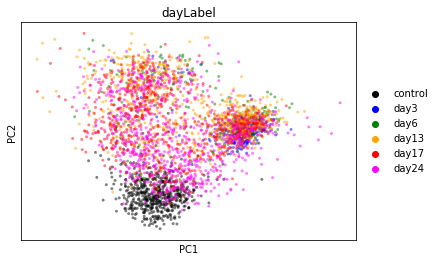

In [71]:
scanpy.tl.pca(adata, svd_solver='arpack')
scanpy.pl.pca(adata,color=['dayLabel'],palette=['black','blue','green','orange','red','magenta'],alpha=0.5)

## 6.4. Uniform Manifold Approximation and Projection (UMAP)

2019-04-26 08:32:02
computing neighbors
    using 'X_pca' with n_pcs = 50
    computed neighbors (0:00:00.50)
    computed connectivities (0:00:00.79)
    finished (0:00:00.00) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix
computing UMAP
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
    finished (0:00:06.86) --> added
    'X_umap', UMAP coordinates (adata.obsm)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.34) --> found 11 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


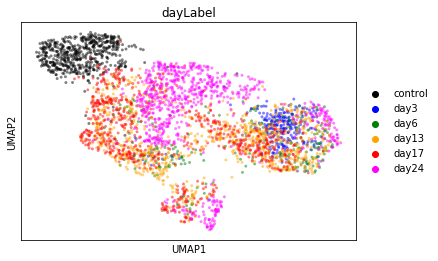

2019-04-26 08:32:11


In [69]:
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

scanpy.pp.neighbors(adata, n_neighbors=10, n_pcs=50)
scanpy.tl.umap(adata)
scanpy.tl.louvain(adata)
scanpy.pl.umap(adata, color=['dayLabel'],palette=['black','blue','green','orange','red','magenta'],alpha=0.5)

print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

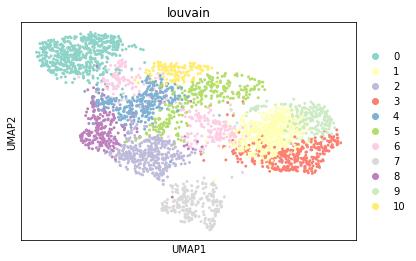

In [70]:
scanpy.pl.umap(adata, color=['louvain'],palette='Set3')